# Спринт 5 «Исследовательский анализ данных»

# Проект «Исследование объявлений о продаже квартир»

## Навигация

1. [Описание проекта](#Описание-проекта)
1. [Описание данных](#Описание-данных)
1. [Предобработка данных](#Предобработка-данных)
   - [Пропуски](#Пропуски)
   - [Типы данных](#Типы-данных)
   - [Устранения неявных дубликатов (нормализация)](#Устранения-неявных-дубликатов-(нормализация))
   - [Устранение редких и выбивающихся значений](#Устранение-редких-и-выбивающихся-значений)
1. [Создание новых признаков](#Создание-новых-признаков)
1. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
   - [Исследование параметров объектов](#Исследование-параметров-объектов)
   - [Исследование быстроты продаж квартир](#Исследование-быстроты-продаж-квартир)
   - [Факторы больше всего влияющие на стоимость объекта](#Факторы-больше-всего-влияющие-на-стоимость-объекта)
   - [Цена за квадратный метр](#Цена-за-квадратный-метр)
   - [Средние цены по удалённости от центра](#Средние-цены-по-удалённости-от-центра)
1. [Общий вывод](#Общий-вывод)

## Описание проекта

[к навигации](#Навигация)

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Описание данных

[к навигации](#Навигация)

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_theme()

In [2]:
data = pd.read_csv(os.path.join('..', 'datasets', 'real_estate_data.csv'), sep='\t', parse_dates=['first_day_exposition'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


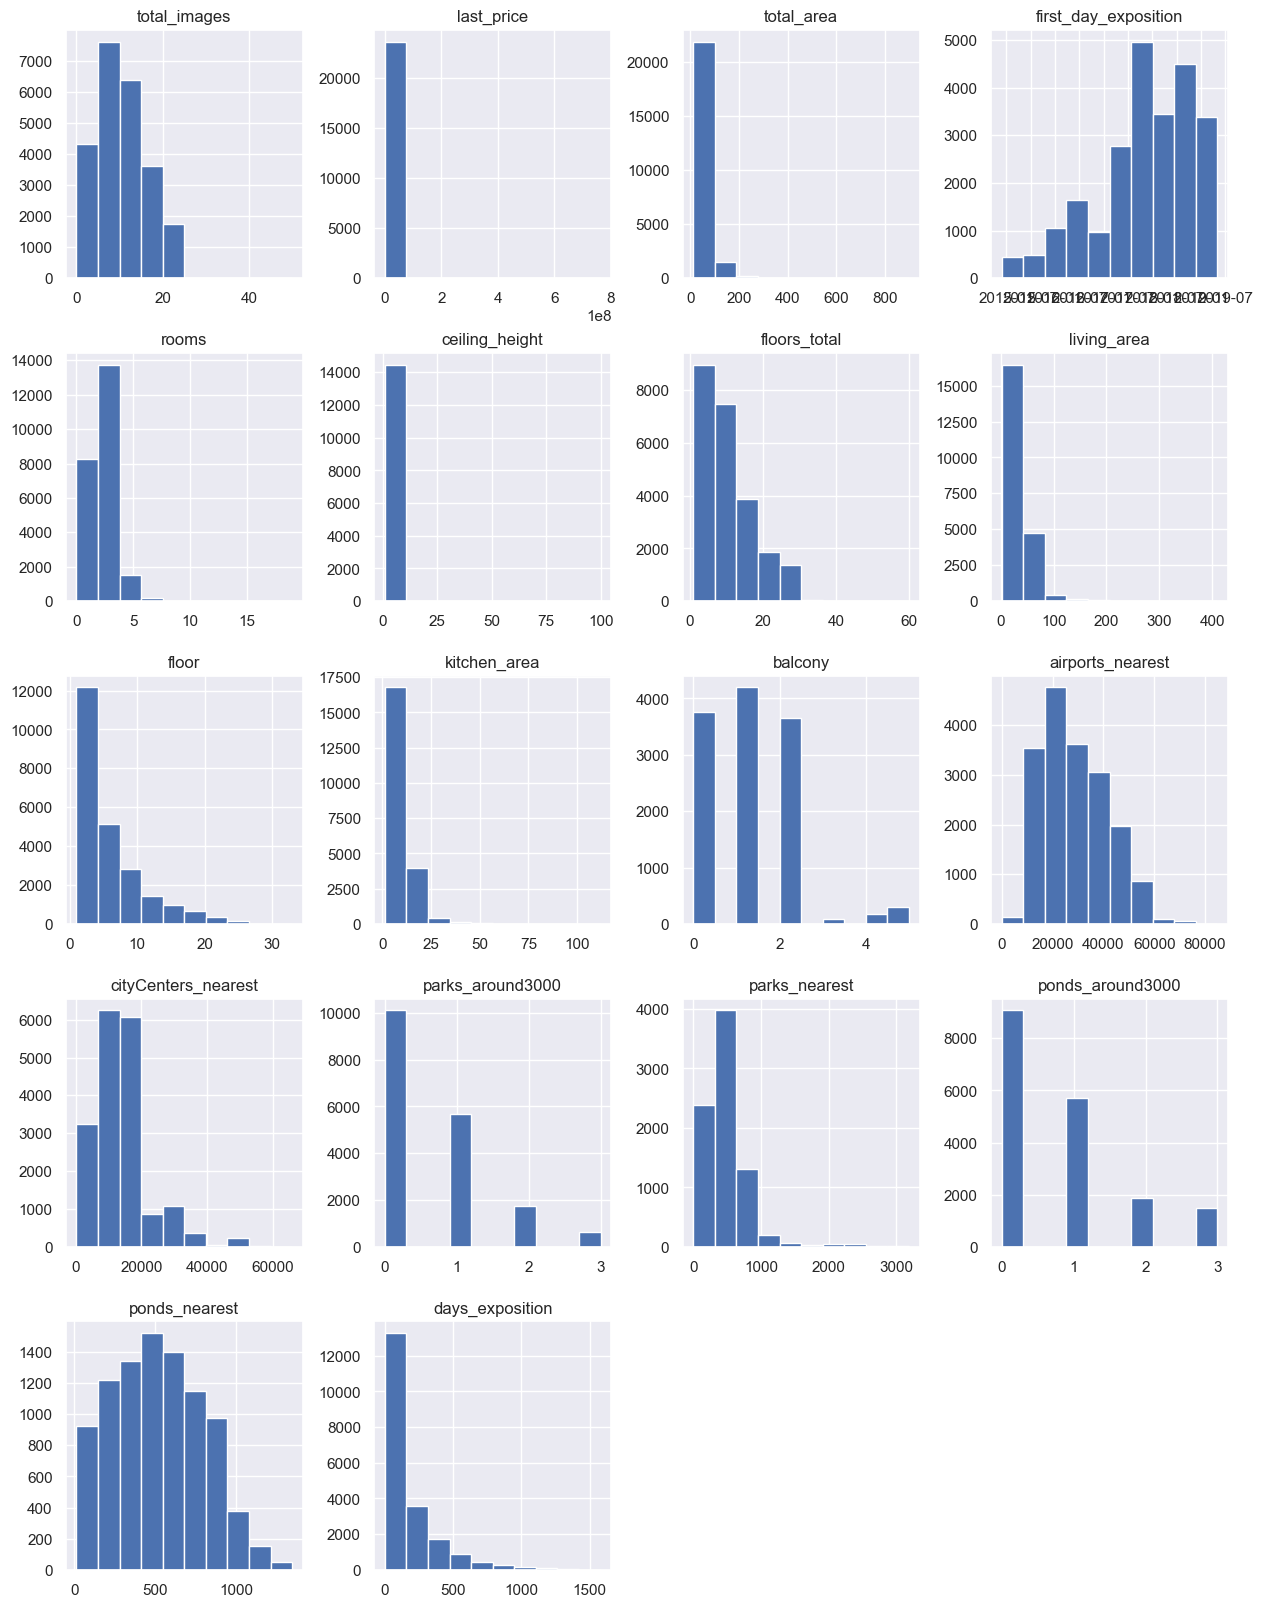

In [5]:
ax = data.hist(figsize=(15, 20))

## Предобработка данных

[к навигации](#Навигация)

### Пропуски

[к навигации](#Навигация)

По выводу ячейки [3] можно понять, что пропуски есть в столбцах `['ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']`. (Всего 14 таких столбцов)

In [6]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean() * 100)
            .to_frame()
            .rename(columns={0: 'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19, 6), legend=False, fontsize=16)
            .set_title('Пример', fontsize=22, color='SteelBlue')
        )
    except:
        print('пропусков не осталось :)')

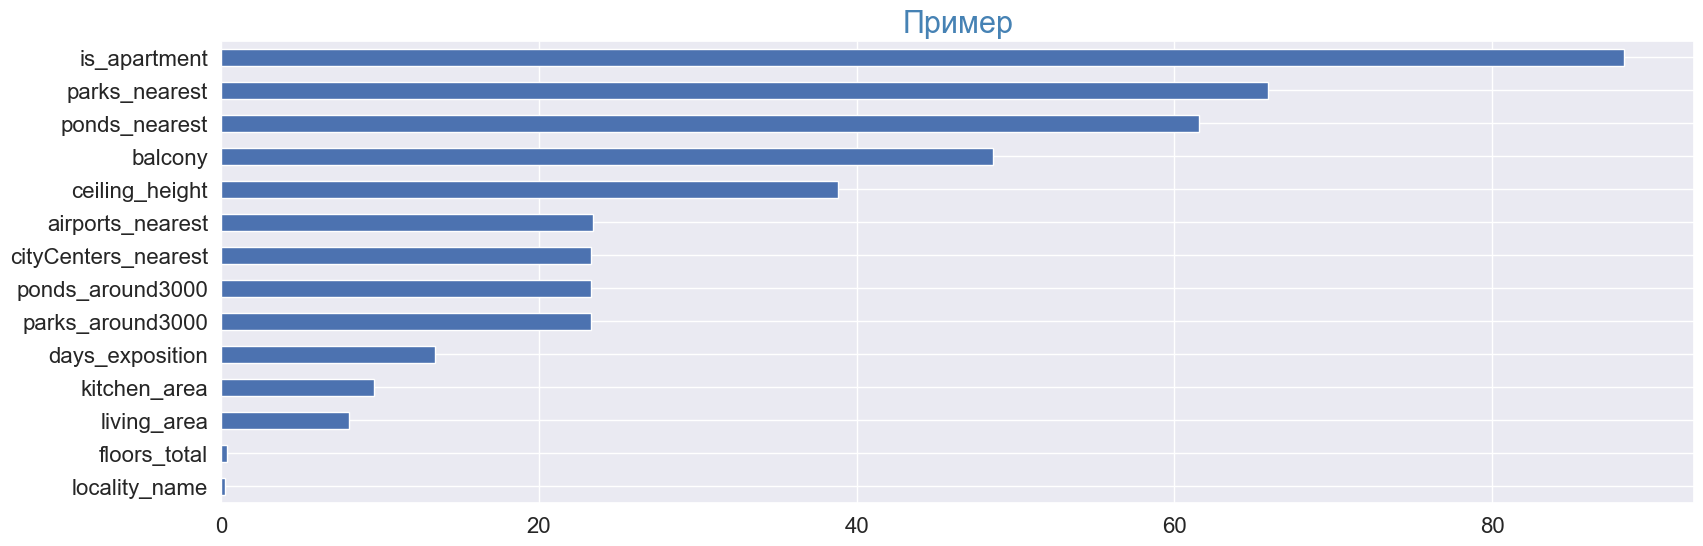

In [7]:
pass_value_barh(data)

##### ceiling_height — высота потолков (м) 

In [8]:
print(f'Доля пропусков {data["ceiling_height"].isna().mean():.2%}')

Доля пропусков 38.80%


In [9]:
# решил заполнить медианой, так как есть выбивающиеся значения, которые сдвигают среднее
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

*Гипотеза*: Думаю, что многие не знают высоты потолков в своей квартире. Я, например, тоже не помню) К тому же, если выста не экзотична, она не особо интересует покупателей.

##### floors_total — всего этажей в доме

In [10]:
print(f'Доля пропусков {data["floors_total"].isna().mean():.2%}')

Доля пропусков 0.36%


In [11]:
# считаю, здесь нужно заменить пропуски модой
data['floors_total'].fillna(data['floors_total'].mode(), inplace=True)

*Гипотеза*: Пропусков очень мало. Возможно люди очень редко случайно пропускали данный пункт по какой-либо причине.

In [12]:
def chek_floors(row):
    result = row['floors_total']
    if result < row['floor']:
        result = row['floor']
    
    return result

In [13]:
data['floors_total'] = data.apply(chek_floors, axis=1)

##### living_area — жилая площадь в квадратных метрах (м²)

In [14]:
print(f'Доля пропусков {data["living_area"].isna().mean():.2%}')

Доля пропусков 8.03%


##### is_apartment — апартаменты (булев тип)

In [15]:
print(f'Доля пропусков {data["is_apartment"].isna().mean():.2%}')

Доля пропусков 88.29%


Оставил пропуски, так как их доля очень велика.
*Гипотеза*: может это новая фича, которая появилась не так давно.

##### kitchen_area — площадь кухни в квадратных метрах (м²)

In [16]:
print(f'Доля пропусков {data["kitchen_area"].isna().mean():.2%}')

Доля пропусков 9.61%


In [17]:
# решил заполнить медианой, так как есть выбивающиеся значения, которые сдвигают среднее
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)

Не могу предположить, по какой причине здесь появились пропуски.  
Вряд ли бывают квартиры без кухни. При чём, что их доля порядка 1/10.

##### balcony — число балконов

In [18]:
print(f'Доля пропусков {data["balcony"].isna().mean():.2%}')

Доля пропусков 48.61%


In [19]:
# пример из задания
data['kitchen_area'].fillna(0, inplace=True)

##### locality_name — название населённого пункта

In [20]:
print(f'Доля пропусков {data["locality_name"].isna().mean():.2%}')

Доля пропусков 0.21%


##### airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

In [21]:
print(f'Доля пропусков {data["airports_nearest"].isna().mean():.2%}')

Доля пропусков 23.38%


In [22]:
# решил заполнить СРЕДНИМ, так как хвост распределения не большой
data['kitchen_area'].fillna(data['kitchen_area'].mean(), inplace=True)

*Гипотеза*: Я бы предположил, что если стоит пропуск, значит нет ближайшего аэропорта в некоторой ограниченной зоне.  Но их что-то слишком много ...

##### cityCenters_nearest — расстояние до центра города (м)

In [23]:
print(f'Доля пропусков {data["cityCenters_nearest"].isna().mean():.2%}')

Доля пропусков 23.29%


*Гипотеза*: Здесь могут быть объекты не расположенные в городе. Но тоже их как-то многовато.
Думаю, что эт оважные пропуски. Не стал их заполнять.

##### parks_around3000 — число парков в радиусе 3 км

In [24]:
print(f'Доля пропусков {data["parks_around3000"].isna().mean():.2%}')

Доля пропусков 23.28%


*Гипотеза*: Возможно так же как с балконами: если рядом парка нет, люди ничего и не поставили.

In [25]:
data['parks_around3000'].fillna(0, inplace=True)

##### parks_nearest — расстояние до ближайшего парка (м)

In [26]:
print(f'Доля пропусков {data["parks_nearest"].isna().mean():.2%}')

Доля пропусков 65.91%


Доля пропусков слишком велика, чтобы заполнять чем-то.  
*Гипотеза*: Люди не знают расстояние до ближайшего парка.

##### ponds_around3000 — число водоёмов в радиусе 3 км

In [27]:
print(f'Доля пропусков {data["ponds_around3000"].isna().mean():.2%}')

Доля пропусков 23.28%


_Гипотеза_: Возможно так же как с балконами: если рядом водоёма нет, люди ничего и не поставили.

In [28]:
data['ponds_around3000'].fillna(0, inplace=True)

##### ponds_nearest — расстояние до ближайшего водоёма (м)

In [29]:
print(f'Доля пропусков {data["ponds_nearest"].isna().mean():.2%}')

Доля пропусков 61.56%


Доля пропусков слишком велика, чтобы заполнять чем-то.  
*Гипотеза*: Люди не знают расстояние до ближайшего водоёма.

##### days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [30]:
print(f'Доля пропусков {data["days_exposition"].isna().mean():.2%}')

Доля пропусков 13.42%


*Гипотеза*: это новые объявления, которые размещены меньше суток.

**Заметки**: Ещё можно заметить сопоставимую долю пропусков у фич `airports_nearest`, `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` в 23.3%; а у `parks_nearest` и `ponds_nearest` в 63%.

### Типы данных

[к навигации](#Навигация)

- Даты я ещё на этапе чтения файла привёл к `datetime`.
- Можно оптимизировать выделенную память, понизив размерность типов численных данных.

In [31]:
for dtype in ['integer', 'float']:
    for column in data.select_dtypes(dtype):
        data[column] = pd.to_numeric(data[column], downcast=dtype)
        
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        23699 non-null  float32       
 6   floors_total          23613 non-null  float32       
 7   living_area           21796 non-null  float32       
 8   floor                 23699 non-null  int8          
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32       
 13  balcony         

### Устранения неявных дубликатов (нормализация)

[к навигации](#Навигация)

In [32]:
for i in data.loc[data['locality_name'].notna(), 'locality_name'].unique():
    data['locality_name'].replace({i: i.replace('поселок', 'посёлок')}, inplace=True)
    data['locality_name'].replace({i: i.replace('городской посёлок', 'посёлок городского типа')}, inplace=True)

### Устранение редких и выбивающихся значений

[к навигации](#Навигация)

In [33]:
data = data.query('last_price <= 2e7')  # порог подбирал так, чтобы не очень много отсечь. этот убирает ~3%
data = data.query('total_area <= 150')  # порог подбирал так, чтобы не очень много отсечь. этот убирает ~3%
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10
data = data.query('2 <= ceiling_height <= 4')
data = data.query('rooms <= 6')
data = data.query('7 <= living_area <= 150')  # порог подбирал так, чтобы не очень много отсечь. этот убирает ~1.5%
data = data.query('5 <= kitchen_area <= 35')  # порог подбирал так, чтобы не очень много отсечь. этот убирает ~1.5%
data = data.query('airports_nearest <= 60_000 or airports_nearest.isna()')
data = data.query('cityCenters_nearest <= 40_000 or cityCenters_nearest.isna()')
data = data.query('days_exposition <= 1000 or days_exposition.isna()')

## Создание новых признаков

[к навигации](#Навигация)

In [34]:
def floor_type(row):
    if row['floor'] <= 0:
        result = 'формат неизвестный'
    elif row['floor'] == 1:
        result = 'первый'
    elif row['floor'] == row['floors_total']:
        result = 'последний'
    else:
        result = 'другой'
        
    return result

In [35]:
data['meter_price'] = data['last_price'] / data['total_area']
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['floor_type'] = data.apply(floor_type, axis=1)
data['cityCenters_km'] = round(data['cityCenters_nearest'] / 1000)

## Исследовательский анализ данных

[к навигации](#Навигация)

### Исследование параметров объектов

[к навигации](#Навигация)

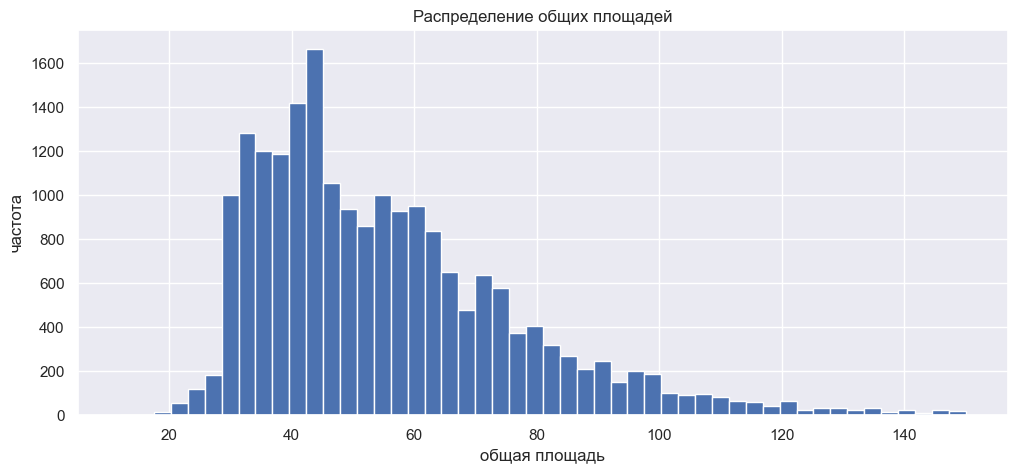

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))
data['total_area'].hist(bins=50, ax=ax)
ax.set(title='Распределение общих площадей', xlabel='общая площадь', ylabel='частота')
plt.show()

Распределение Пуассона

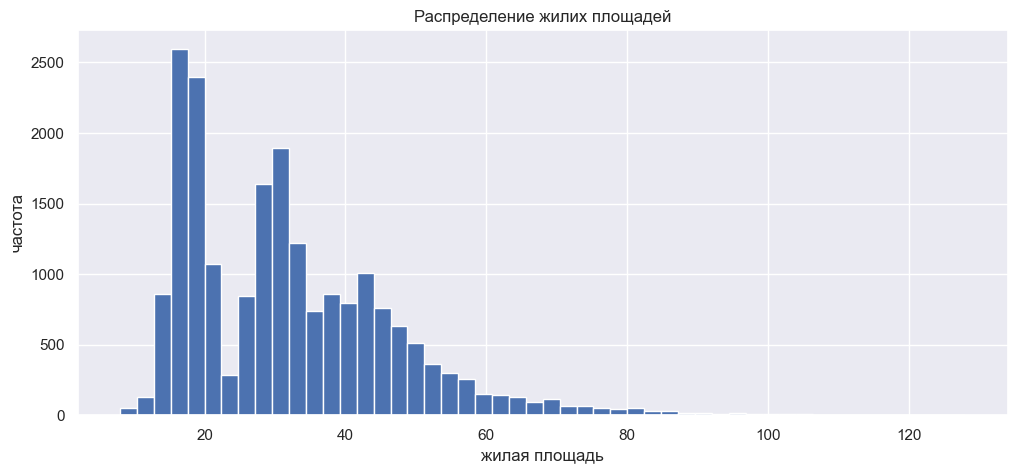

In [37]:
fig, ax = plt.subplots(figsize=(12, 5))
data['living_area'].hist(bins=50, ax=ax)
ax.set(title='Распределение жилих площадей', xlabel='жилая площадь', ylabel='частота')
plt.show()

Распределение Пуассона с 2 ярко выраженными пиками. Пик около 30 - заполнение пропусков медианой. А вот пик 18-19 интересен.

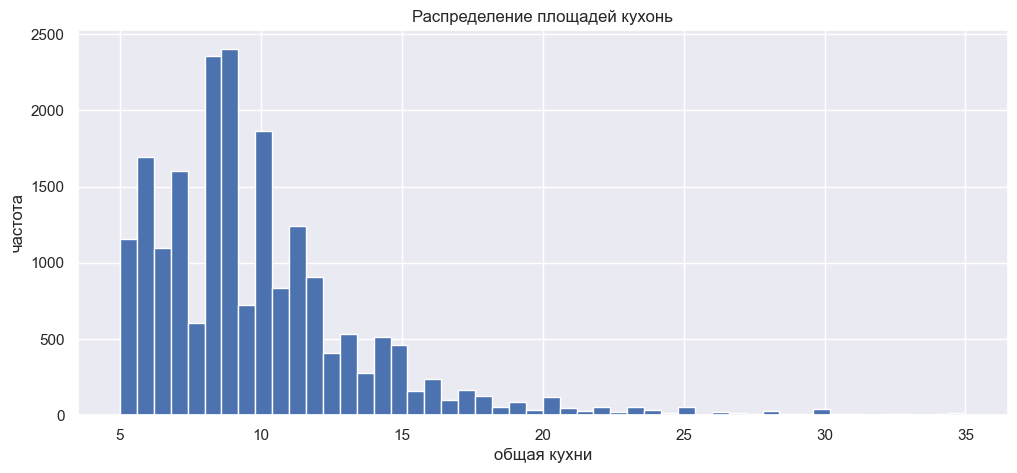

In [38]:
fig, ax = plt.subplots(figsize=(12, 5))
data['kitchen_area'].hist(bins=50, ax=ax)
ax.set(title='Распределение площадей кухонь', xlabel='общая кухни', ylabel='частота')
plt.show()

Распределение Пуассона с ярким пиком, обоснованный заполнением медианой.

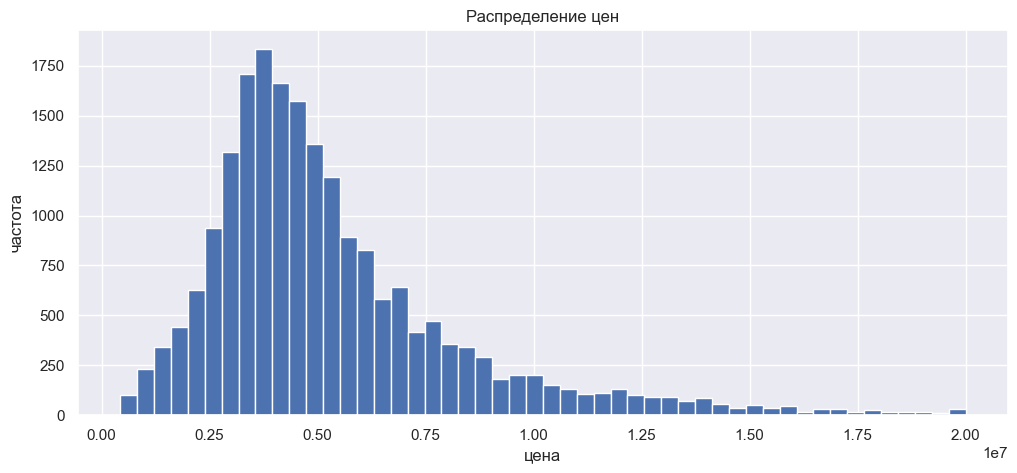

In [39]:
fig, ax = plt.subplots(figsize=(12, 5))
data['last_price'].hist(bins=50, ax=ax)
ax.set(title='Распределение цен', xlabel='цена', ylabel='частота')
plt.show()

Распределение Пуассона

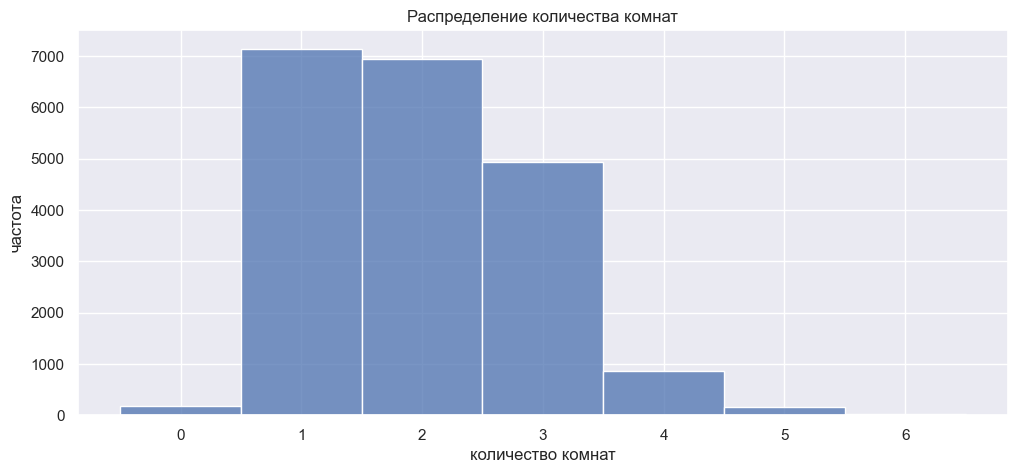

In [40]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data, x='rooms', discrete=True, ax=ax)
ax.set(title='Распределение количества комнат', xlabel='количество комнат', ylabel='частота')
plt.show()

Странно, что кто-то указал 0 комнат. В остальном всё норм.

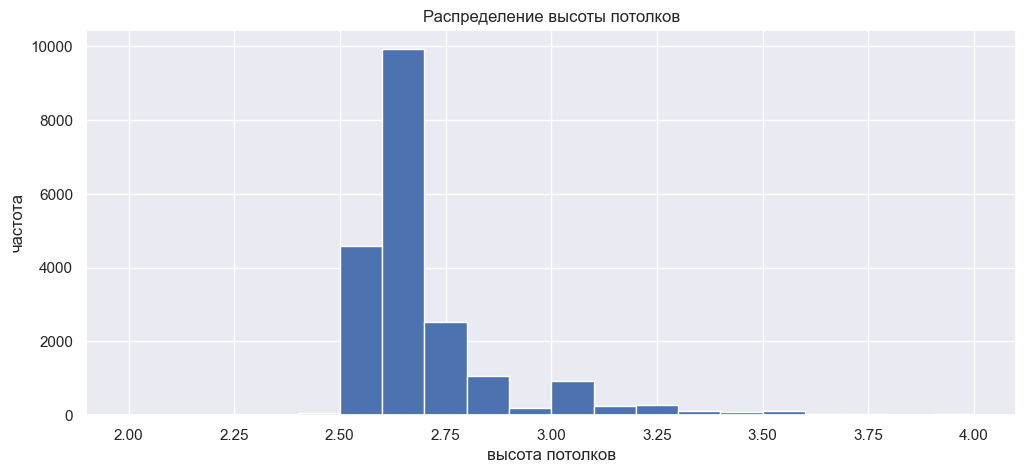

In [41]:
fig, ax = plt.subplots(figsize=(12, 5))
data['ceiling_height'].hist(bins=20, ax=ax)
ax.set(title='Распределение высоты потолков', xlabel='высота потолков', ylabel='частота')
plt.show()

Здесь тоже всё ожидаемо

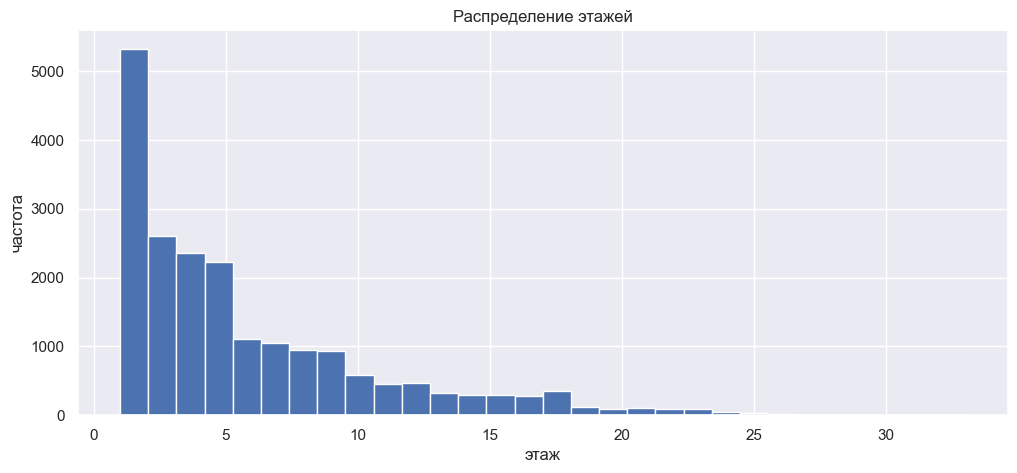

In [42]:
fig, ax = plt.subplots(figsize=(12, 5))
data['floor'].hist(bins=30, ax=ax)
ax.set(title='Распределение этажей', xlabel='этаж', ylabel='частота')
plt.show()

Сильно много сдаётся первых этажей.

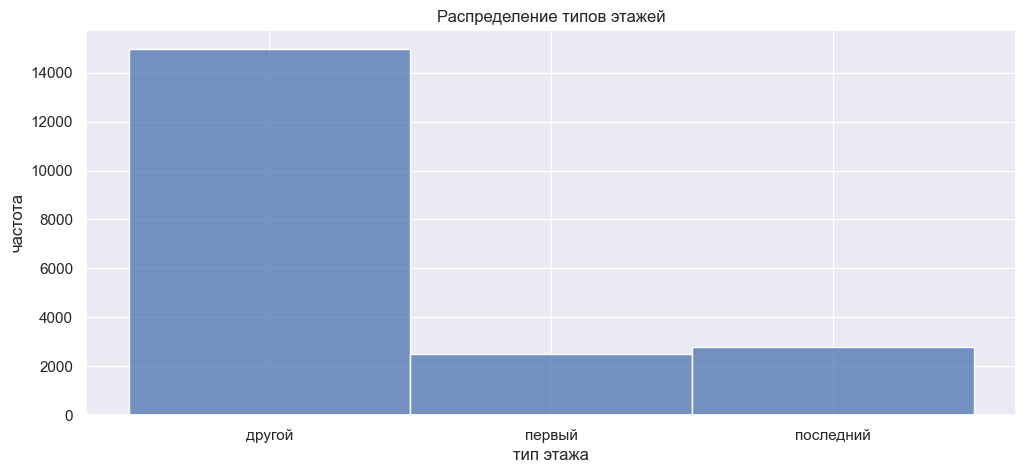

In [43]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data, x='floor_type', discrete=True, ax=ax)
ax.set(title='Распределение типов этажей', xlabel='тип этажа', ylabel='частота')
plt.show()

Оказывается и последних тоже.

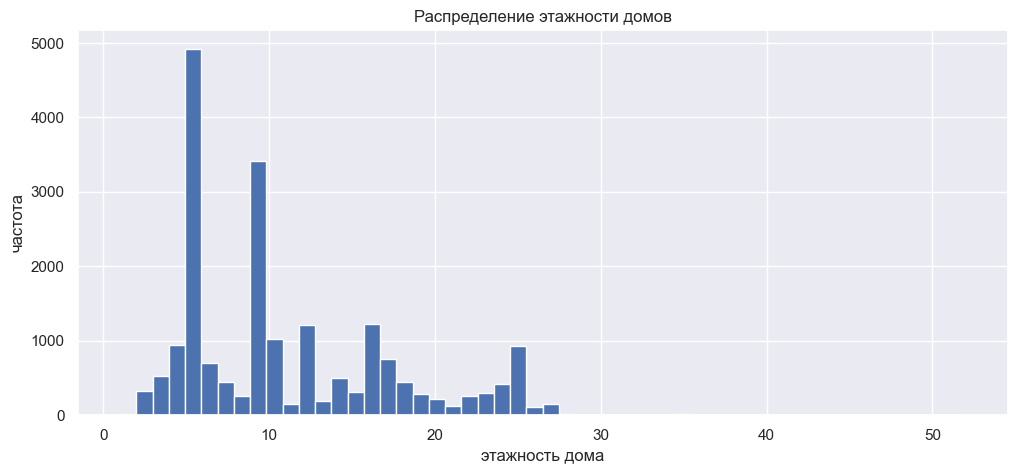

In [44]:
fig, ax = plt.subplots(figsize=(12, 5))
data['floors_total'].hist(bins=52, ax=ax)
ax.set(title='Распределение этажности домов', xlabel='этажность дома', ylabel='частота')
plt.show()

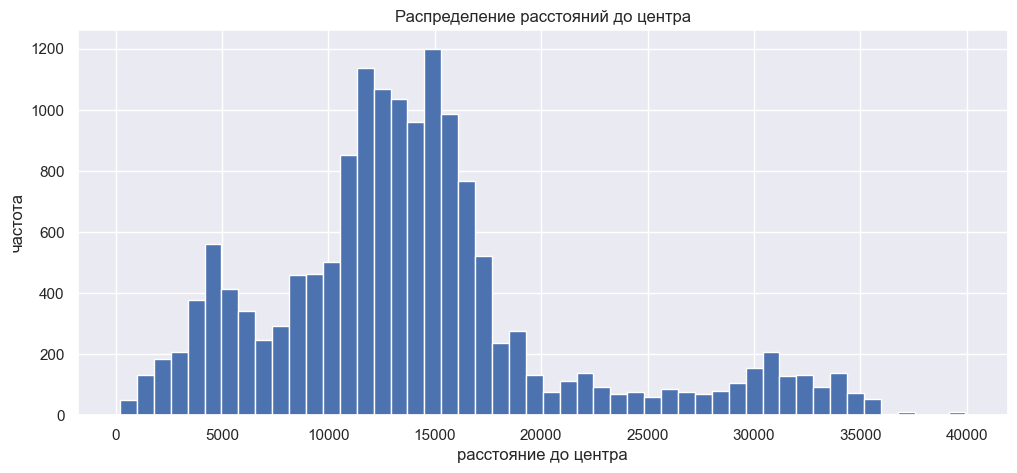

In [45]:
fig, ax = plt.subplots(figsize=(12, 5))
data['cityCenters_nearest'].hist(bins=50, ax=ax)
ax.set(title='Распределение расстояний до центра', xlabel='расстояние до центра', ylabel='частота')
plt.show()

Интересное распределение. Есть 3 пика: около 5км, 15км и 31км.

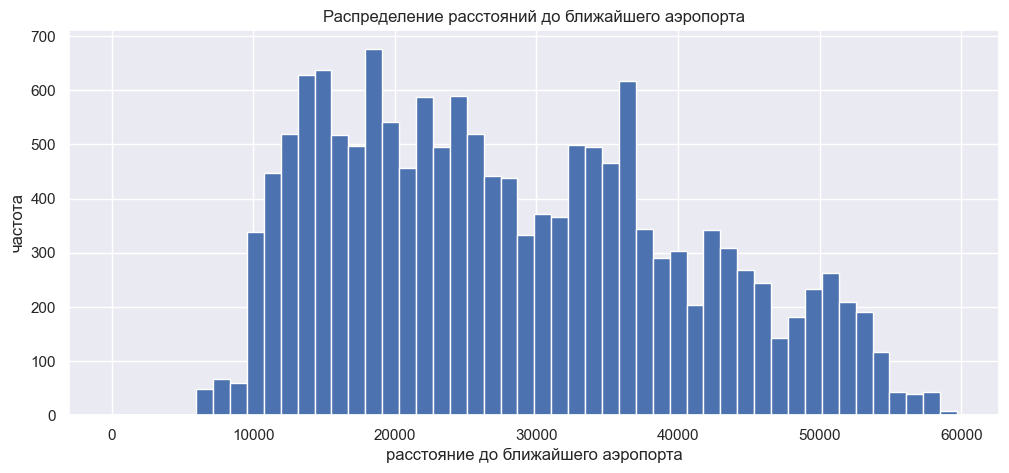

In [46]:
fig, ax = plt.subplots(figsize=(12, 5))
data['airports_nearest'].hist(bins=50, ax=ax)
ax.set(
    title='Распределение расстояний до ближайшего аэропорта',
    xlabel='расстояние до ближайшего аэропорта',
    ylabel='частота',
)
plt.show()

Рядом с аэропортом никто не живёт. В остальном всё норм.

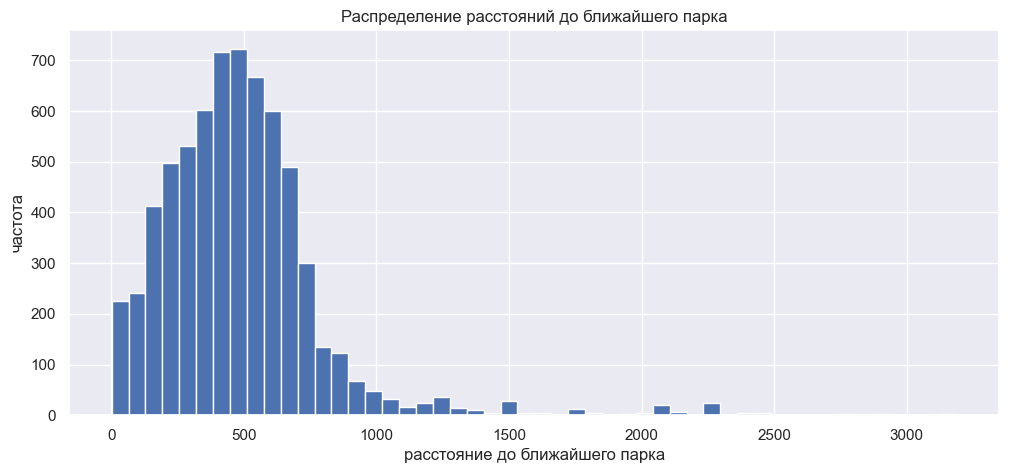

In [47]:
fig, ax = plt.subplots(figsize=(12, 5))
data['parks_nearest'].hist(bins=50, ax=ax)
ax.set(title='Распределение расстояний до ближайшего парка', xlabel='расстояние до ближайшего парка', ylabel='частота')
plt.show()

Распределение Пуассона

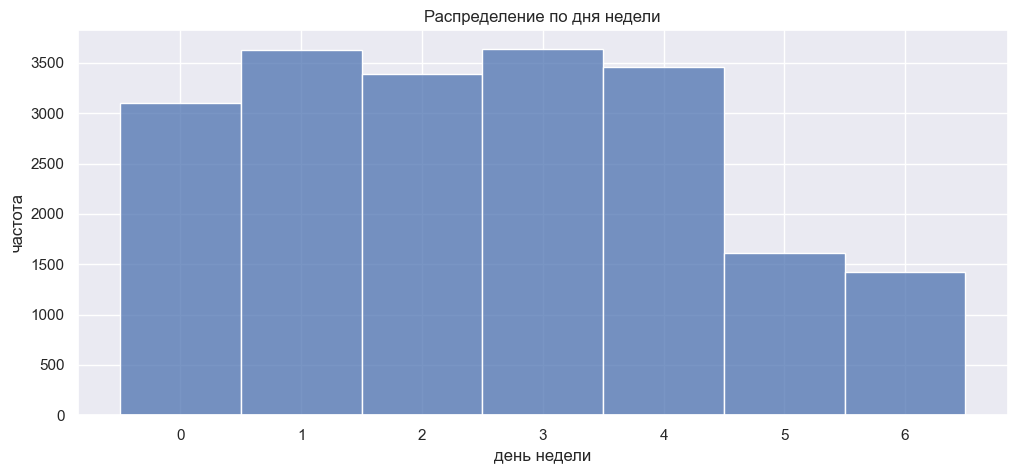

In [48]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data, x='weekday', discrete=True, ax=ax)
ax.set(title='Распределение по дня недели', xlabel='день недели', ylabel='частота')
plt.show()

По выходным объявления публикуются в 2 раза реже.

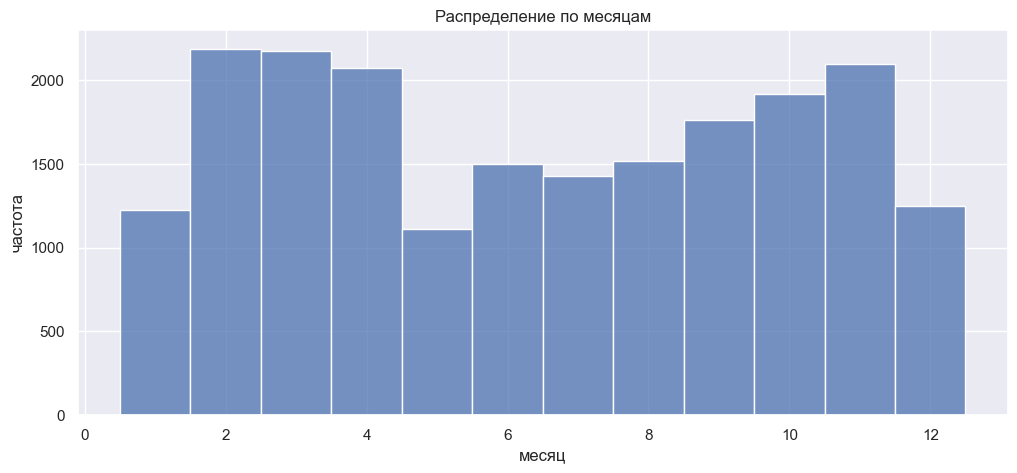

In [49]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data, x='month', discrete=True, ax=ax)
ax.set(title='Распределение по месяцам', xlabel='месяц', ylabel='частота')
plt.show()

Мало публикаций в январе. С февраля по апрель - самый пик с плавным уменьшением. Затем идёт резкий спад в мае. Потом до ноября плавно количество публикаций растёт и падает в ноябре.

### Исследование быстроты продаж квартир

[к навигации](#Навигация)

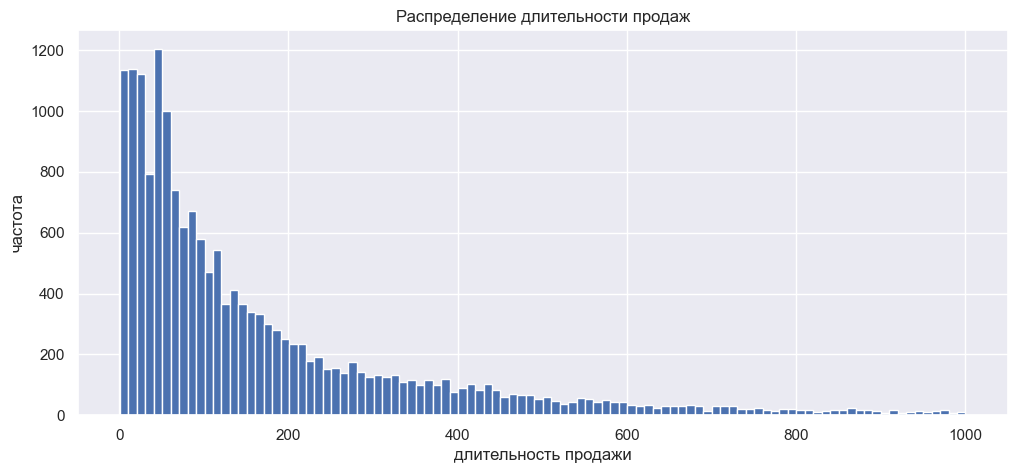

In [50]:
fig, ax = plt.subplots(figsize=(12, 5))
data['days_exposition'].hist(bins=100, ax=ax)
ax.set(title='Распределение длительности продаж', xlabel='длительность продажи', ylabel='частота')
plt.show()

In [51]:
print(f'Среднее арифметическое: {data["days_exposition"].mean():.2f}')
print(f'Медиана: {data["days_exposition"].median():.2f}')

Среднее арифметическое: 168.40
Медиана: 97.00


Всё, что до медианы, - быстрые продажи. Необычно долгими я бы назвал продажи превышающие 200 дней.

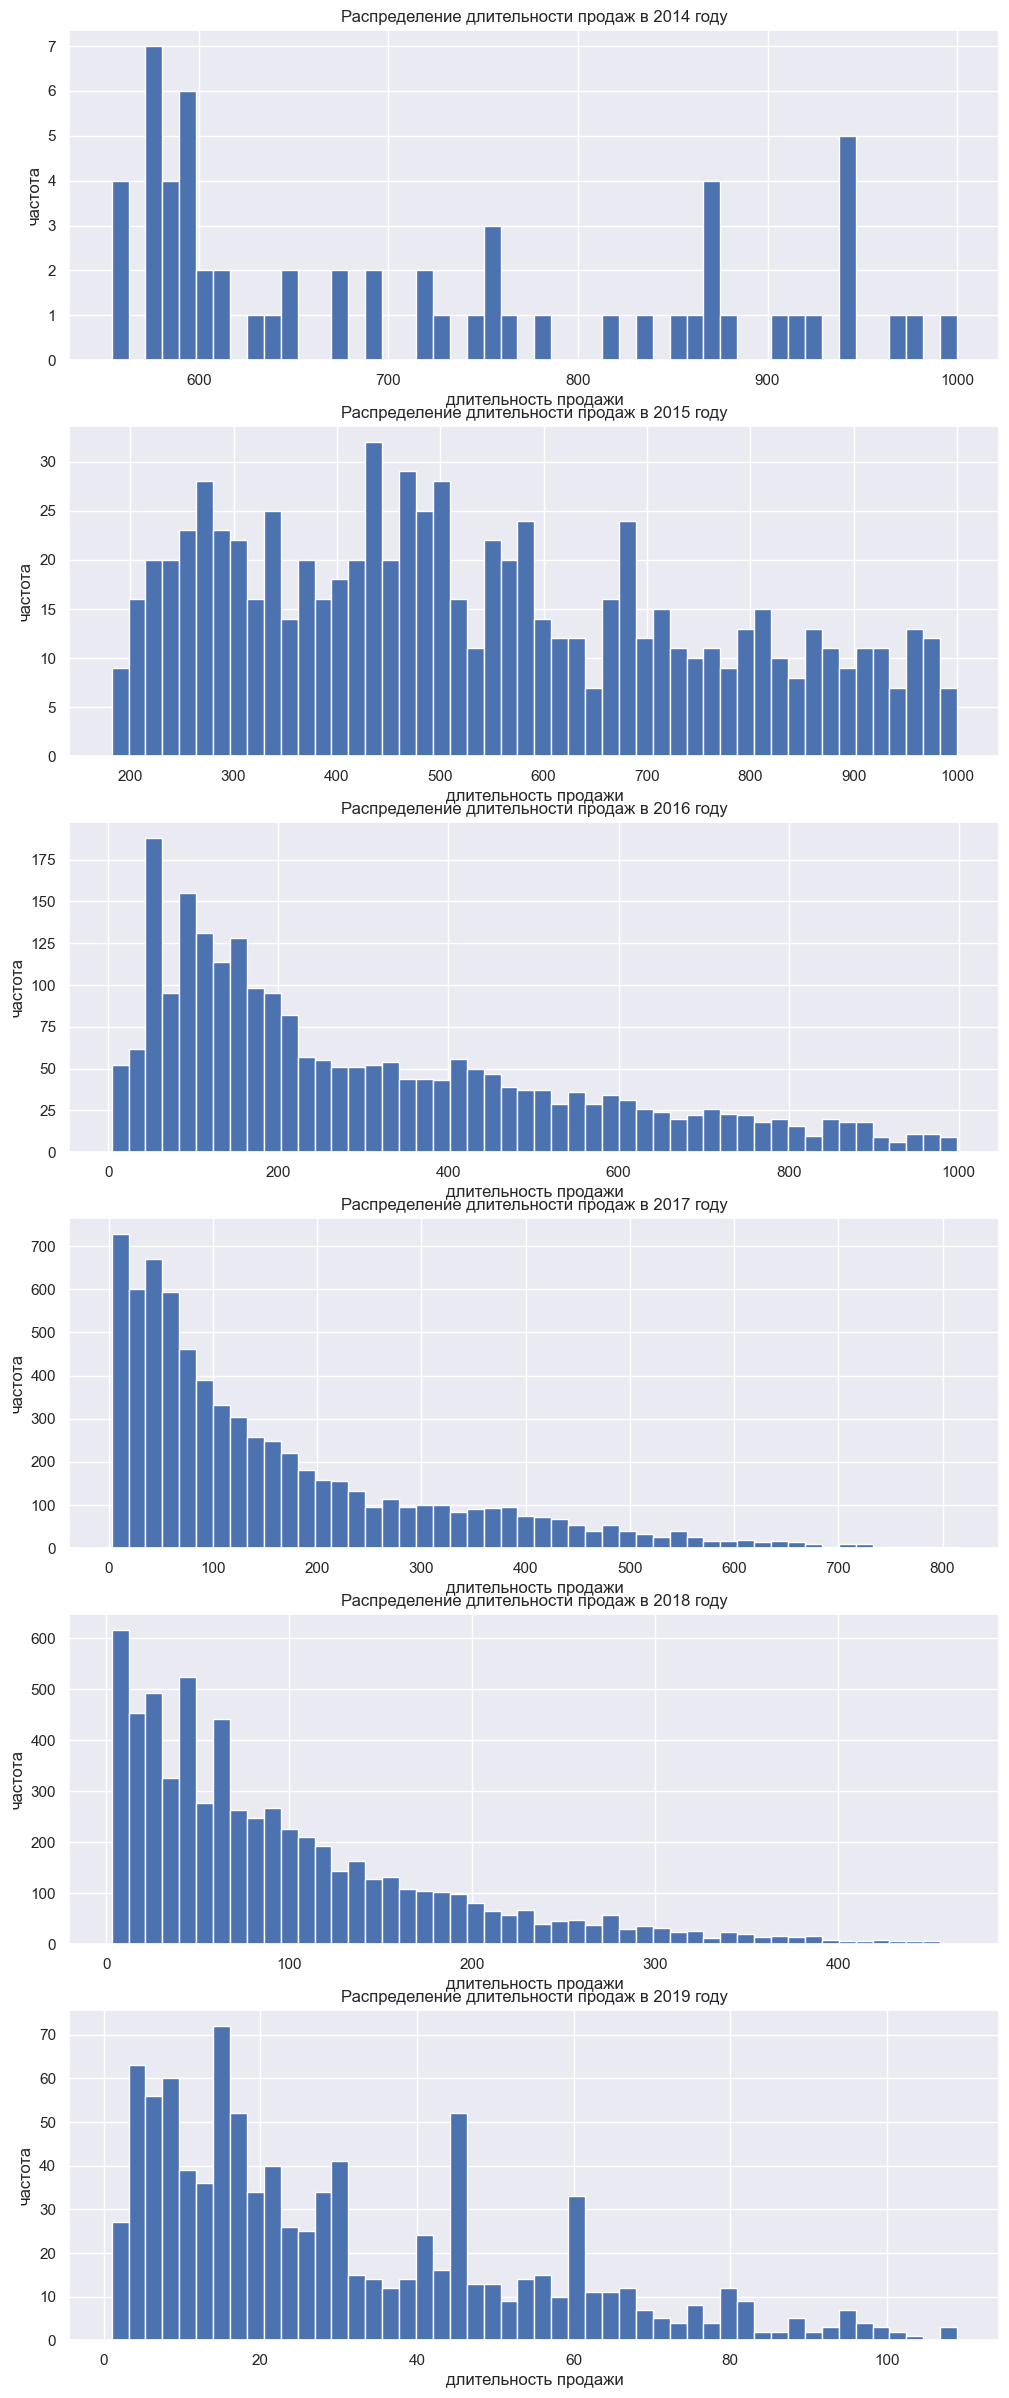

In [52]:
fig, axes = plt.subplots(6, 1, figsize=(12, 30))
for year, ax in zip(sorted(data['year'].unique()), axes):
    data.query(f'year == {year}')['days_exposition'].hist(bins=50, ax=ax)
    ax.set(title=f'Распределение длительности продаж в {year} году', xlabel='длительность продажи', ylabel='частота')
plt.show()

### Факторы больше всего влияющие на стоимость объекта

[к навигации](#Навигация)

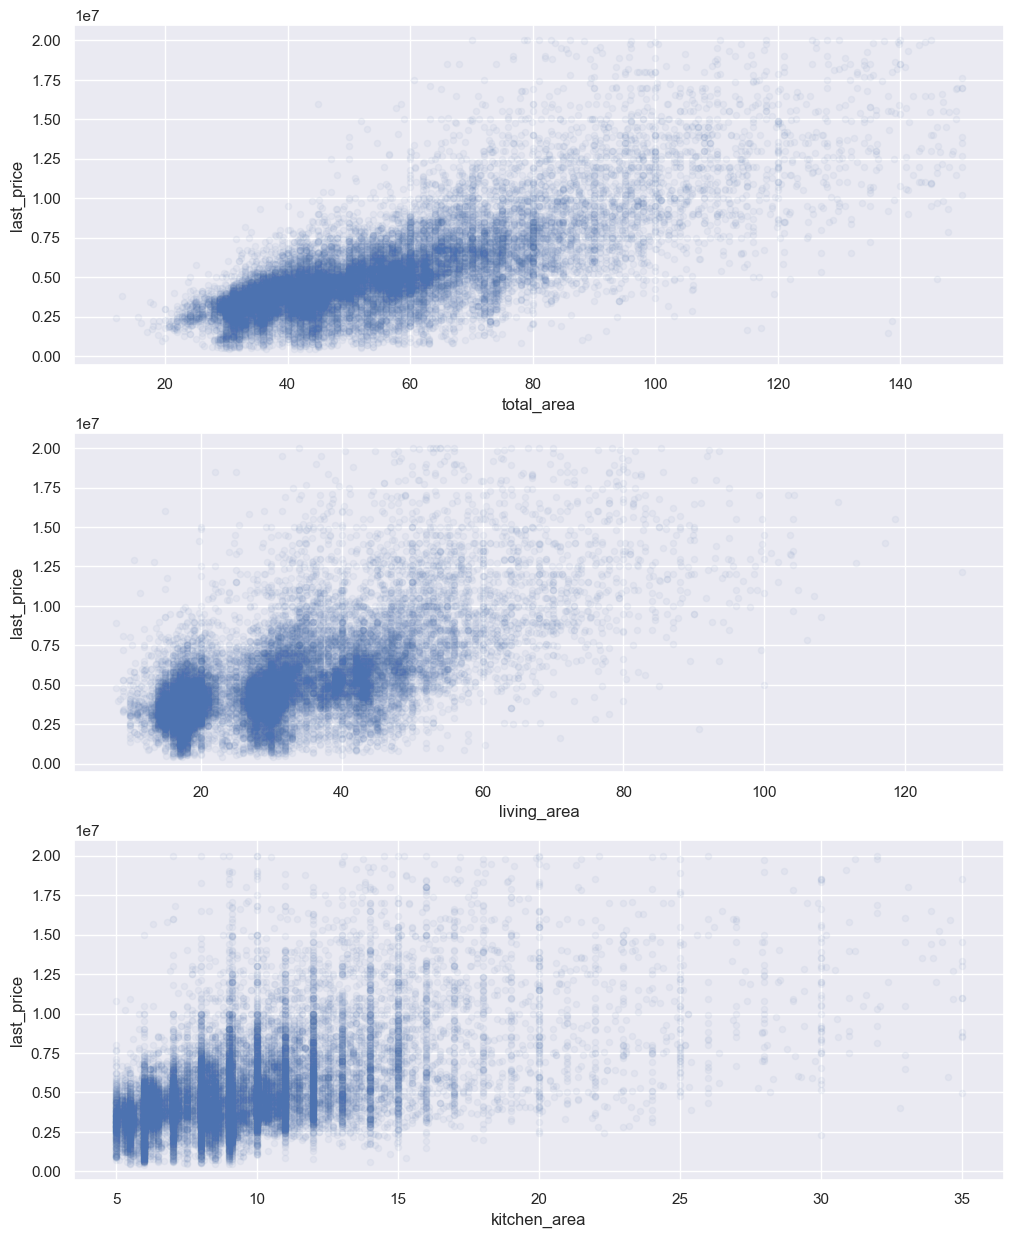

In [53]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
for feature, ax in zip(['total_area', 'living_area', 'kitchen_area'], axes):
    data.plot(x=feature, y='last_price', kind='scatter', alpha=.05, ax=ax)
plt.show()

In [54]:
print(f'Корреляция между стоимостью квартиры и общей площадью составила {data["last_price"].corr(data["total_area"]):.2f}')
print(f'Корреляция между стоимостью квартиры и жилой площадью составила {data["last_price"].corr(data["living_area"]):.2f}')
print(f'Корреляция между стоимостью квартиры и площадью кухни составила {data["last_price"].corr(data["kitchen_area"]):.2f}')

Корреляция между стоимостью квартиры и общей площадью составила 0.76
Корреляция между стоимостью квартиры и жилой площадью составила 0.64
Корреляция между стоимостью квартиры и площадью кухни составила 0.55


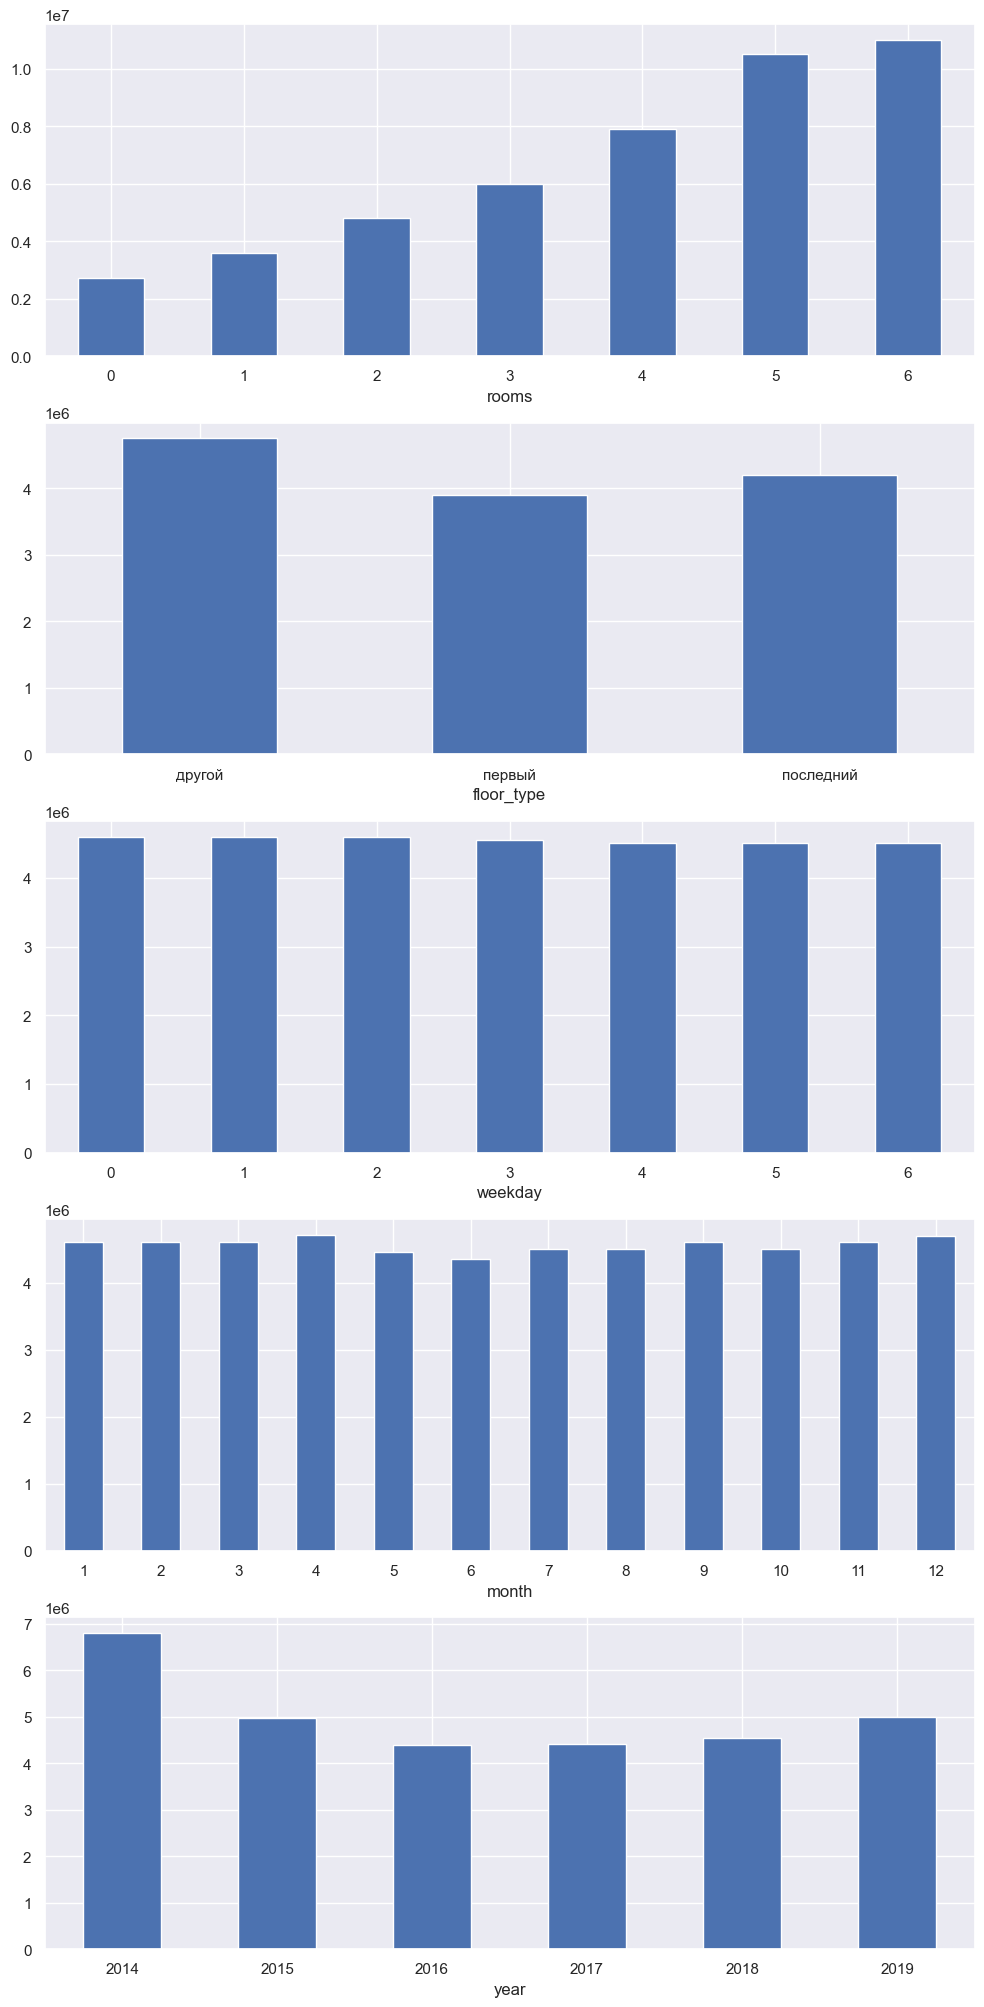

In [55]:
fig, axes = plt.subplots(5, 1, figsize=(12, 25))
for feture, ax in zip(['rooms', 'floor_type', 'weekday', 'month', 'year'], axes):
    data.groupby(feture)['last_price'].median().plot(kind='bar', rot=0, ax=ax)
plt.show()

### Цена за квадратный метр

[к навигации](#Навигация)

In [56]:
meter_price = data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'mean'])
meter_price.columns=['count', 'mean']
meter_price.sort_values('count', ascending=False)[:10].sort_values('mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,13516,108332.273438
Пушкин,321,102303.250000
посёлок Парголово,273,92803.390625
деревня Кудрово,257,92755.101562
посёлок Мурино,483,86231.601562
посёлок Шушары,396,78726.765625
Колпино,325,75194.031250
Гатчина,286,68656.195312
Всеволожск,365,67313.296875


### Средние цены по удалённости от центра

[к навигации](#Навигация)

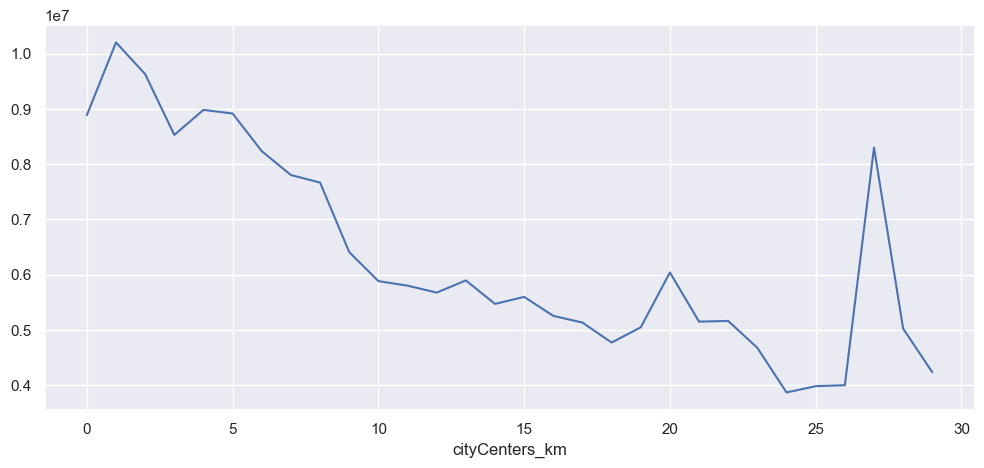

In [57]:
fig, ax = plt.subplots(figsize=(12, 5))
data.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_km')['last_price'].mean().plot(ax=ax)
plt.show()

## Общий вывод

[к навигации](#Навигация)

~~В данной лабораторной работе~~ Предобработали данные:
- где могли заполнили пропуски, где не могли - оставили
- обработали выбивающиеся значения: что-то поудаляли, что-то отредактировали

Нашли следующие инсайты:
- стоимость квартиры сильно коррелирует с жилой площадью
- квартиры с бОльшим количеством комнат стоят больше (капитан очевидность)
- с 2014 года количество предложений о продажах падали до 2017 года и чуть откатились к 2019
- поразила история продаж с 2014 года (лучше смотреть на графики, сложно описать кратко)